# 使用napari进行交互式图像可视化
[napari](https://napari.org/)是一个基于Python的图像查看器。这个笔记本演示了如何从Python远程控制它。

另请参阅
* [napari查看器教程](https://napari.org/tutorials/fundamentals/viewer.html)
* [napari图像层教程](https://napari.org/tutorials/fundamentals/image.html)
* [napari标签层教程](https://napari.org/tutorials/fundamentals/labels.html)
* [使用napari进行多维图像可视化的Python方法 [NEUBIAS Academy@Home] 网络研讨会](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

为了打开图像，我们仍然使用scikit-image：

In [1]:
import napari
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatm
import napari_skimage_regionprops as nsr

In [2]:
# Create an empty viewer
viewer = napari.Viewer()

首先我们加载一张图像并在查看器中显示它。

In [3]:
image = imread('../../data/nuclei.tif')

viewer.add_image(image)

<Image layer 'image' at 0x1e423868df0>

使用这个命令，我们可以对napari进行截图并将其保存在我们的笔记本中。

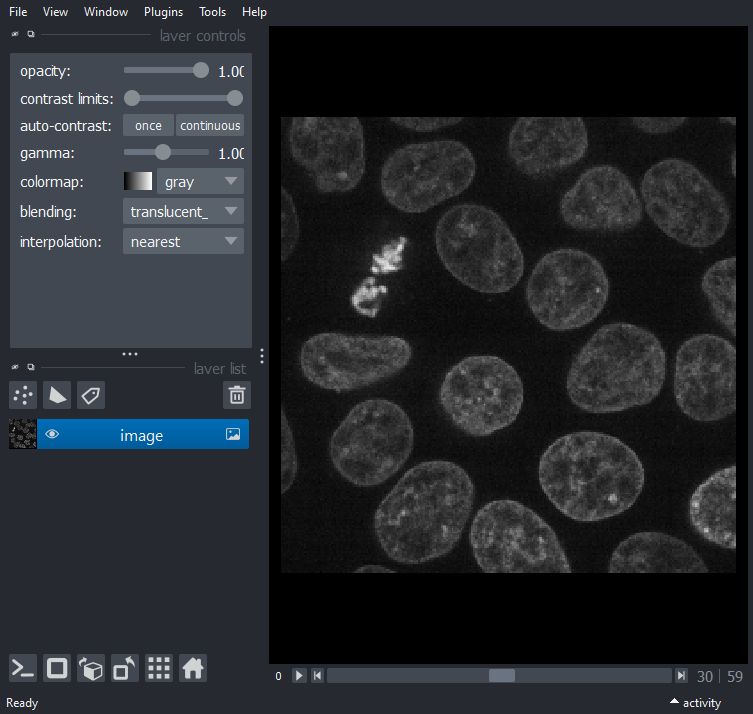

In [4]:
napari.utils.nbscreenshot(viewer)

## 细胞分割
我们还可以对细胞核进行分割，并将其显示在图像上。

In [5]:
label_image = nsbatm.voronoi_otsu_labeling(image, spot_sigma=9)

# add labels to viewer
label_layer = viewer.add_labels(label_image)

你可以将标记的对象可视化为叠加层（默认）

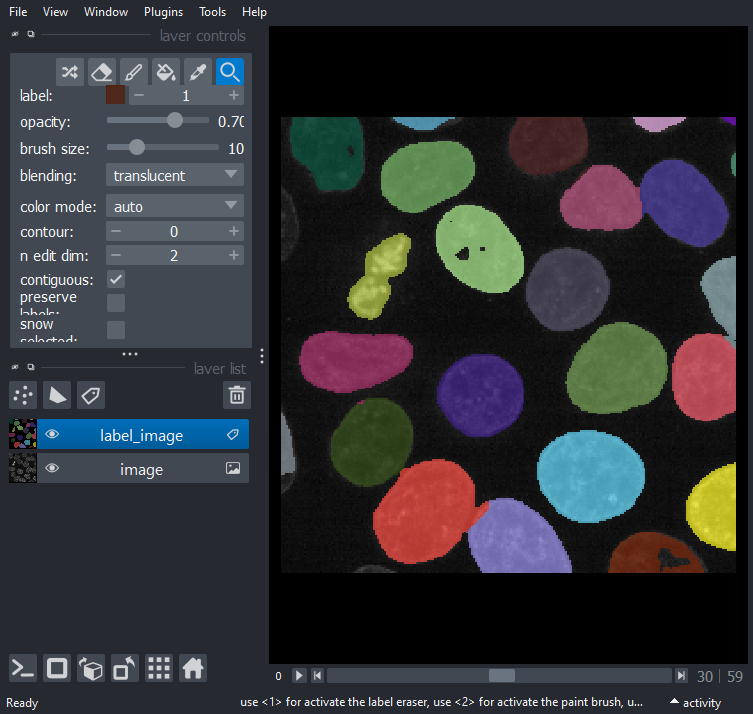

In [6]:
napari.utils.nbscreenshot(viewer)

... 或者作为不透明的轮廓

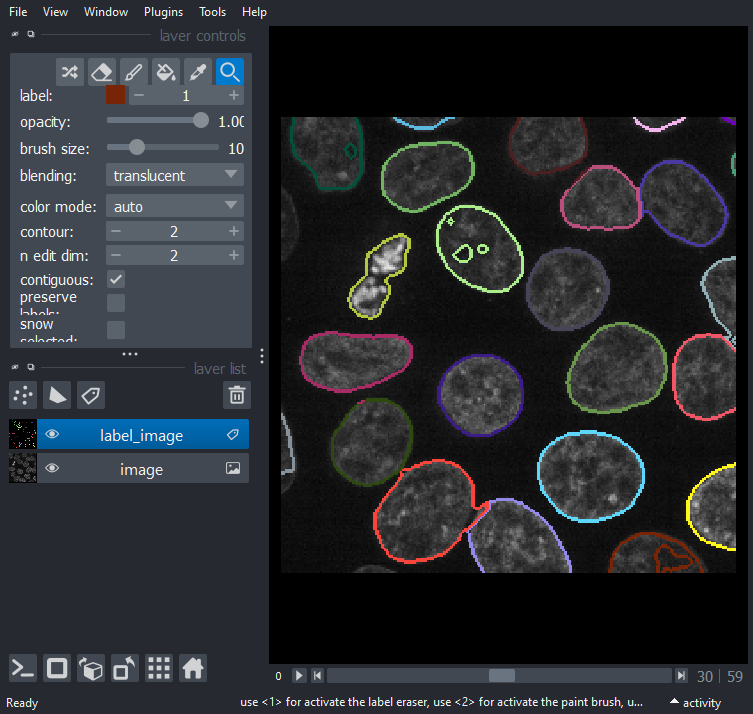

In [7]:
label_layer.contour = 2
label_layer.opacity = 1

napari.utils.nbscreenshot(viewer)

## 定量测量
我们还可以进行定量测量并将其附加到napari查看器上。

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


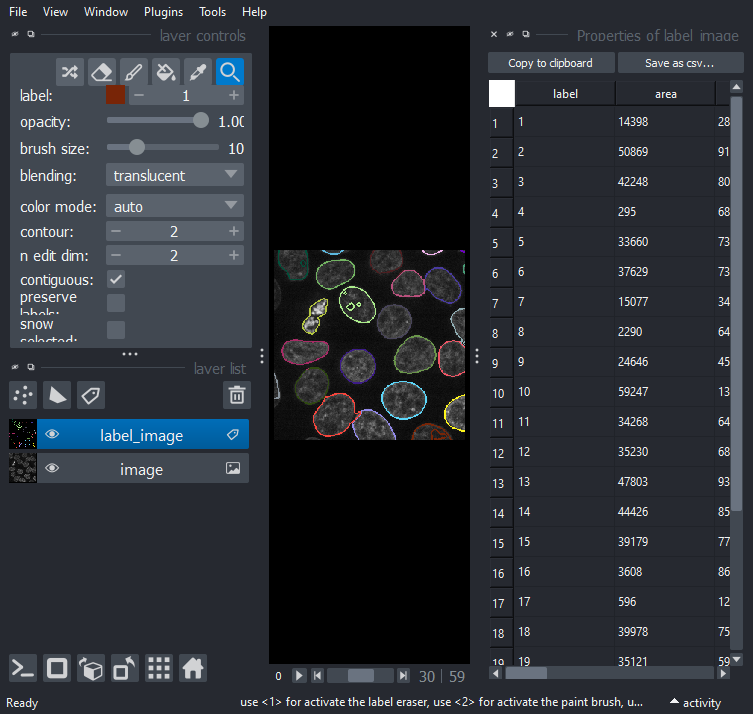

In [8]:
nsr.regionprops_table(image, label_image, napari_viewer=viewer)

napari.utils.nbscreenshot(viewer)